## Installing Deps

In [1]:
%pip install pandas
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from joblib import dump
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("Dataset/depression_prediction.csv", dtype={'column_name': str}, low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36259 entries, 0 to 36258
Data columns (total 90 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SEQN                          36259 non-null  int64  
 1   depression                    36259 non-null  object 
 2   gender                        36259 non-null  int64  
 3   age                           36259 non-null  int64  
 4   education_level               36259 non-null  int64  
 5   marital_status                36259 non-null  object 
 6   household_size                36259 non-null  int64  
 7   pregnant                      36259 non-null  object 
 8   veteran                       36259 non-null  object 
 9   household_income              36259 non-null  int64  
 10  heart_disease                 36259 non-null  float64
 11  angina                        36259 non-null  float64
 12  heart_attack                  36259 non-null  float64
 13  s

## Cleaning dataset

In [4]:
df = pd.get_dummies(df, columns=['marital_status', 'pregnant', 'veteran', 'full_time_work', 'work_type', 'out_of_work', 'vigorous_recreation', 'moderate_recreation', 'lifetime_alcohol_consumption'])

columns_with_more_than_two_values = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 2]

for col in columns_with_more_than_two_values:
    print(f"Column: {col}")
    print(df[col].unique())

df.head()

,SEQN,depression,gender,age,education_level,household_size,household_income,heart_disease,angina,heart_attack,...,out_of_work_School,vigorous_recreation_Missing,vigorous_recreation_No,vigorous_recreation_Yes,moderate_recreation_Missing,moderate_recreation_No,moderate_recreation_Yes,lifetime_alcohol_consumption_Missing,lifetime_alcohol_consumption_No,lifetime_alcohol_consumption_Yes
0,31131,Not Depressed,1,44,4,4,11,0.0,0.0,0.0,...,False,False,True,False,False,True,False,False,False,True
1,31132,Not Depressed,0,70,5,2,11,0.0,0.0,0.0,...,False,False,True,False,False,False,True,True,False,False
2,31134,Not Depressed,0,73,3,2,5,0.0,0.0,0.0,...,False,False,True,False,False,False,True,True,False,False
3,31139,Not Depressed,1,18,0,3,11,0.0,0.0,0.0,...,False,False,False,True,False,False,True,True,False,False
4,31143,Not Depressed,0,19,0,3,11,0.0,0.0,0.0,...,False,False,False,True,False,True,False,True,False,False


In [5]:
def save_predict(model):
    filename = os.path.join('Models', model.__class__.__name__ + '.joblib')
    dump(model, filename)

### Train, Test Split

In [6]:
X = df.drop('depression', axis=1)
y = df['depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Random Forest Classifier

In [7]:
clf = RandomForestClassifier(n_estimators=100, min_samples_split=2, max_depth=None)
clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

               precision    recall  f1-score   support

    Depressed       0.61      0.04      0.08       666
Not Depressed       0.91      1.00      0.95      6586

     accuracy                           0.91      7252
    macro avg       0.76      0.52      0.51      7252
 weighted avg       0.88      0.91      0.87      7252

0.909542195256481


#### K-nearest Neighbours Classifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN:
               precision    recall  f1-score   support

    Depressed       0.12      0.03      0.05       666
Not Depressed       0.91      0.98      0.94      6586

     accuracy                           0.89      7252
    macro avg       0.52      0.50      0.49      7252
 weighted avg       0.84      0.89      0.86      7252

Accuracy: 0.8924434638720353


#### Logistic Regression

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))


Logistic Regression:
               precision    recall  f1-score   support

    Depressed       0.52      0.14      0.22       666
Not Depressed       0.92      0.99      0.95      6586

     accuracy                           0.91      7252
    macro avg       0.72      0.56      0.59      7252
 weighted avg       0.88      0.91      0.88      7252

Accuracy: 0.9089906232763376


#### Decision Tree

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree:
               precision    recall  f1-score   support

    Depressed       0.23      0.25      0.24       666
Not Depressed       0.92      0.92      0.92      6586

     accuracy                           0.85      7252
    macro avg       0.58      0.58      0.58      7252
 weighted avg       0.86      0.85      0.86      7252

Accuracy: 0.8547986762272477


### SVM
- Linear
- Ploynomial
- Sigmoid
- RBF

In [11]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("\nSVM (Linear Kernel):")
print(classification_report(y_test, y_pred_linear))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))



SVM (Linear Kernel):
               precision    recall  f1-score   support

    Depressed       0.53      0.03      0.06       666
Not Depressed       0.91      1.00      0.95      6586

     accuracy                           0.91      7252
    macro avg       0.72      0.52      0.51      7252
 weighted avg       0.88      0.91      0.87      7252

Accuracy: 0.90857694429123


In [12]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

print("\nSVM (Polynomial Kernel):")
print(classification_report(y_test, y_pred_poly))
print("Accuracy:", accuracy_score(y_test, y_pred_poly))


SVM (Polynomial Kernel):
               precision    recall  f1-score   support

    Depressed       0.00      0.00      0.00       666
Not Depressed       0.91      1.00      0.95      6586

     accuracy                           0.91      7252
    macro avg       0.45      0.50      0.48      7252
 weighted avg       0.82      0.91      0.86      7252

Accuracy: 0.9081632653061225


/home/ash/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ash/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ash/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [13]:
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

print("\nSVM (Sigmoid Kernel):")
print(classification_report(y_test, y_pred_sigmoid))
print("Accuracy:", accuracy_score(y_test, y_pred_sigmoid))


SVM (Sigmoid Kernel):
               precision    recall  f1-score   support

    Depressed       0.09      0.08      0.09       666
Not Depressed       0.91      0.92      0.91      6586

     accuracy                           0.84      7252
    macro avg       0.50      0.50      0.50      7252
 weighted avg       0.83      0.84      0.84      7252

Accuracy: 0.8410093767236624


In [14]:
# RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\nSVM (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))


SVM (RBF Kernel):
               precision    recall  f1-score   support

    Depressed       0.00      0.00      0.00       666
Not Depressed       0.91      1.00      0.95      6586

     accuracy                           0.91      7252
    macro avg       0.45      0.50      0.48      7252
 weighted avg       0.82      0.91      0.86      7252

Accuracy: 0.9081632653061225


/home/ash/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ash/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ash/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

### Graphs

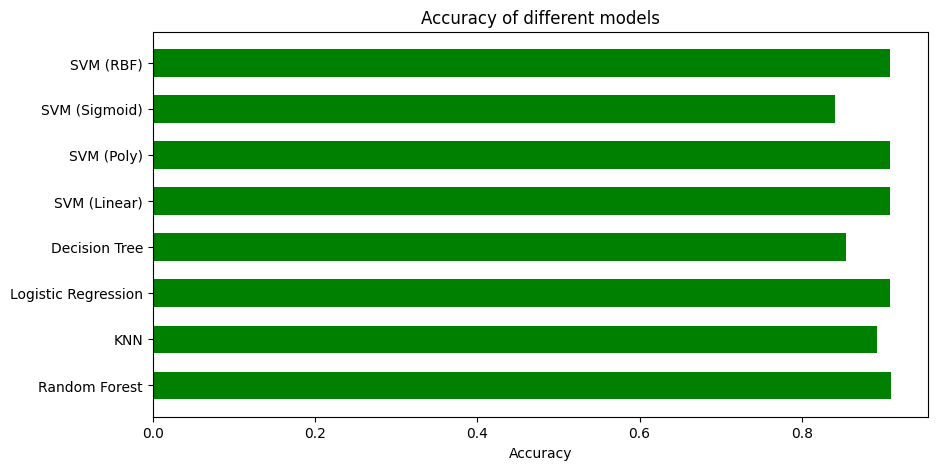

In [15]:
%matplotlib inline

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm_linear = accuracy_score(y_test, y_pred_linear)
accuracy_svm_poly = accuracy_score(y_test, y_pred_poly)
accuracy_svm_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
accuracy_svm_rbf = accuracy_score(y_test, y_pred_rbf)

models = ['Random Forest', 'KNN', 'Logistic Regression', 'Decision Tree', 'SVM (Linear)', 'SVM (Poly)', 'SVM (Sigmoid)', 'SVM (RBF)']
accuracy = [accuracy_rf, accuracy_knn, accuracy_logreg, accuracy_dt, accuracy_svm_linear, accuracy_svm_poly, accuracy_svm_sigmoid, accuracy_svm_rbf]

plt.figure(figsize=(10, 5))
plt.barh(models, accuracy, color='green', height=0.6)
plt.xlabel('Accuracy')
plt.title('Accuracy of different models')
plt.show()

/home/ash/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ash/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ash/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

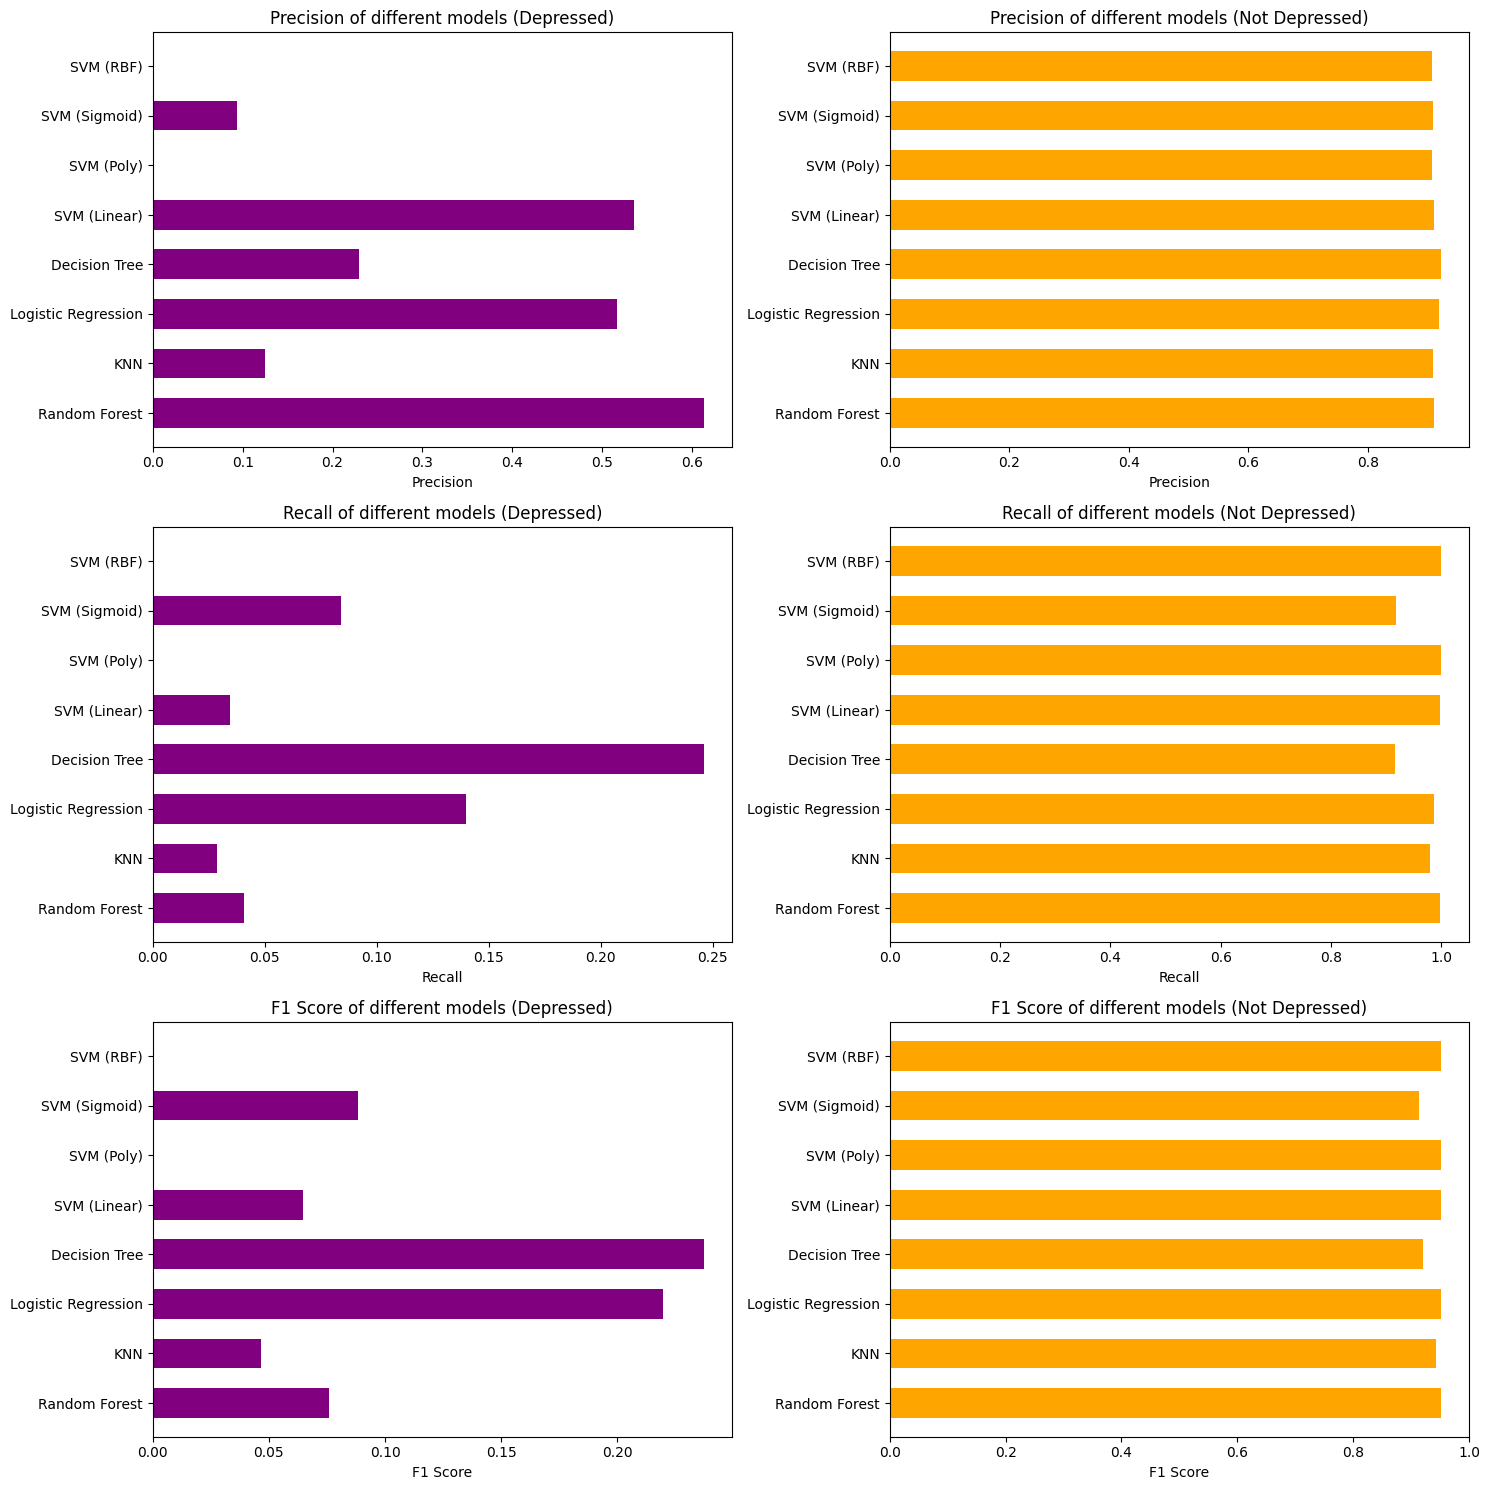

In [16]:
from sklearn.metrics import classification_report

y_preds = [y_pred_rf, y_pred_knn, y_pred_logreg, y_pred_dt, y_pred_linear, y_pred_poly, y_pred_sigmoid, y_pred_rbf]

precision_dep = []
recall_dep = []
f1_dep = []
precision_not_dep = []
recall_not_dep = []
f1_not_dep = []

# Calculate the metrics for each model and add them to the lists
for y_pred in y_preds:
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_dep.append(report['Depressed']['precision'])
    recall_dep.append(report['Depressed']['recall'])
    f1_dep.append(report['Depressed']['f1-score'])
    precision_not_dep.append(report['Not Depressed']['precision'])
    recall_not_dep.append(report['Not Depressed']['recall'])
    f1_not_dep.append(report['Not Depressed']['f1-score'])

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# Plot precision
ax[0, 0].barh(models, precision_dep, color='purple', height=0.6)
ax[0, 0].set_xlabel('Precision')
ax[0, 0].set_title('Precision of different models (Depressed)')
ax[0, 1].barh(models, precision_not_dep, color='orange', height=0.6)
ax[0, 1].set_xlabel('Precision')
ax[0, 1].set_title('Precision of different models (Not Depressed)')

# Plot recall
ax[1, 0].barh(models, recall_dep, color='purple', height=0.6)
ax[1, 0].set_xlabel('Recall')
ax[1, 0].set_title('Recall of different models (Depressed)')
ax[1, 1].barh(models, recall_not_dep, color='orange', height=0.6)
ax[1, 1].set_xlabel('Recall')
ax[1, 1].set_title('Recall of different models (Not Depressed)')

# Plot F1 score
ax[2, 0].barh(models, f1_dep, color='purple', height=0.6)
ax[2, 0].set_xlabel('F1 Score')
ax[2, 0].set_title('F1 Score of different models (Depressed)')
ax[2, 1].barh(models, f1_not_dep, color='orange', height=0.6)
ax[2, 1].set_xlabel('F1 Score')
ax[2, 1].set_title('F1 Score of different models (Not Depressed)')

plt.tight_layout()
plt.show()